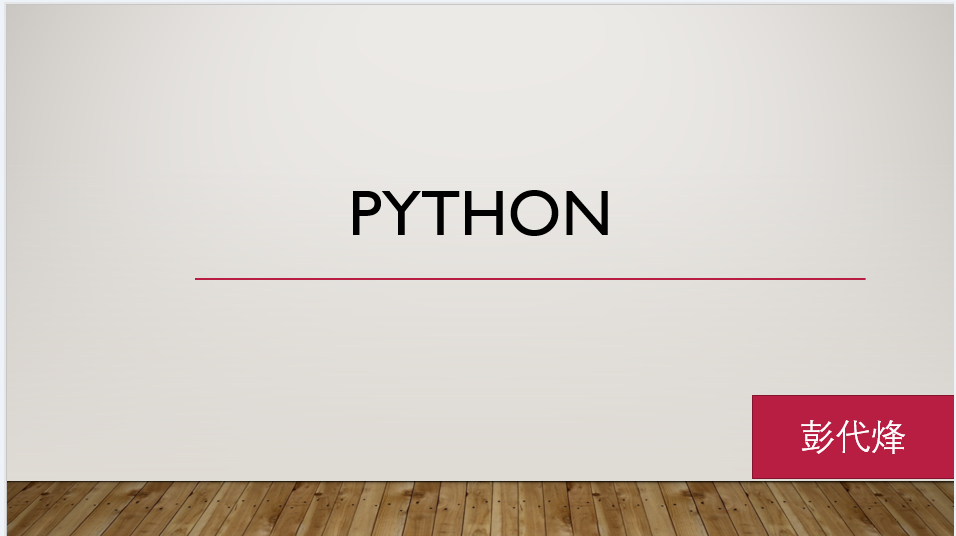

In [1]:
# 导包
import numpy as np
import pandas as pd

In [2]:
# 读入数据
df = pd.read_csv("D:\\data2\\example.txt",header=None)

In [3]:
df.head()

,0,1,2
0,1,1,4
1,1,2,3
2,1,5,5
3,2,1,5
4,2,3,4


In [4]:
# 修改列名
df.columns = ["用户id","物品id","喜好程度"]

In [5]:
df.head()

,用户id,物品id,喜好程度
0,1,1,4
1,1,2,3
2,1,5,5
3,2,1,5
4,2,3,4


In [6]:
df['用户id'].value_counts()

3    4
6    3
2    3
1    3
5    2
4    2
Name: 用户id, dtype: int64

In [7]:
set(df['物品id'])

{1, 2, 3, 4, 5, 6}

In [8]:
# 使用 pivot函数
# 用户id作为行索引, 物品id作为列索引, 统计对应用户和物品之间的相关 喜好程度值
df_pivot = df.pivot(index="用户id",columns="物品id",values="喜好程度")

In [9]:
df_pivot
# 有值的代表该用户对该物品有评分
# 没值的代表该用户没有对该物品评过分

物品id,1,2,3,4,5,6
用户id,,,,,,
1,4.0,3.0,NaN,NaN,5.0,NaN
2,5.0,NaN,4.0,NaN,4.0,NaN
3,4.0,NaN,5.0,3.0,4.0,NaN
4,NaN,3.0,NaN,NaN,NaN,5.0
5,NaN,4.0,NaN,NaN,NaN,4.0
6,NaN,NaN,2.0,4.0,NaN,5.0


In [10]:
# 用户个数
df_pivot.shape

(6, 6)

# 将数据中的空值填充为0

In [11]:
freq = df_pivot.fillna(0)

In [12]:
freq.head()

物品id,1,2,3,4,5,6
用户id,,,,,,
1,4.0,3.0,0.0,0.0,5.0,0.0
2,5.0,0.0,4.0,0.0,4.0,0.0
3,4.0,0.0,5.0,3.0,4.0,0.0
4,0.0,3.0,0.0,0.0,0.0,5.0
5,0.0,4.0,0.0,0.0,0.0,4.0


In [13]:
freq_matrix=freq.values
freq_matrix

array([[4., 3., 0., 0., 5., 0.],
       [5., 0., 4., 0., 4., 0.],
       [4., 0., 5., 3., 4., 0.],
       [0., 3., 0., 0., 0., 5.],
       [0., 4., 0., 0., 0., 4.],
       [0., 0., 2., 4., 0., 5.]])

In [14]:
np.mat(freq.values)  #变成矩阵

matrix([[4., 3., 0., 0., 5., 0.],
        [5., 0., 4., 0., 4., 0.],
        [4., 0., 5., 3., 4., 0.],
        [0., 3., 0., 0., 0., 5.],
        [0., 4., 0., 0., 0., 4.],
        [0., 0., 2., 4., 0., 5.]])

# 使用余弦相似度计算相似度矩阵
在sklearn中有自带的余弦相似度计算函数

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
# 使用余弦相似度函数计算
user_similar = cosine_similarity(freq_matrix)

In [17]:
user_similar

array([[1.        , 0.74926865, 0.62667956, 0.21828206, 0.3       ,
        0.        ],
       [0.74926865, 1.        , 0.91301651, 0.        , 0.        ,
        0.1579597 ],
       [0.62667956, 0.91301651, 1.        , 0.        , 0.        ,
        0.40368671],
       [0.21828206, 0.        , 0.        , 1.        , 0.9701425 ,
        0.63913749],
       [0.3       , 0.        , 0.        , 0.9701425 , 1.        ,
        0.52704628],
       [0.        , 0.1579597 , 0.40368671, 0.63913749, 0.52704628,
        1.        ]])

In [18]:
pd.DataFrame(user_similar)

,0,1,2,3,4,5
0,1.000000,0.749269,0.626680,0.218282,0.300000,0.000000
1,0.749269,1.000000,0.913017,0.000000,0.000000,0.157960
2,0.626680,0.913017,1.000000,0.000000,0.000000,0.403687
3,0.218282,0.000000,0.000000,1.000000,0.970143,0.639137
4,0.300000,0.000000,0.000000,0.970143,1.000000,0.527046
5,0.000000,0.157960,0.403687,0.639137,0.527046,1.000000


# 构建物品推荐函数
假如说我们现在想给第2个用户推荐商品

我们可以用这种方法提取出第2个用户的评分向量

In [19]:
freq_matrix

array([[4., 3., 0., 0., 5., 0.],
       [5., 0., 4., 0., 4., 0.],
       [4., 0., 5., 3., 4., 0.],
       [0., 3., 0., 0., 0., 5.],
       [0., 4., 0., 0., 0., 4.],
       [0., 0., 2., 4., 0., 5.]])

In [21]:
freq_matrix[2,:]

array([4., 0., 5., 3., 4., 0.])

In [22]:
user_id_action = freq_matrix[2,:]      #用户id 对所有商品的行为评分  
user_id_action

array([4., 0., 5., 3., 4., 0.])

In [24]:
user_id_action.shape

(6,)

- 可以用这种方法提取出所有用户对第4个物品的的评分向量

In [25]:
freq_matrix[:,4]

array([5., 4., 4., 0., 0., 0.])

In [26]:
item_id_action = freq_matrix[:,4]      #物品id 得到的所有用户评分  
item_id_action

array([5., 4., 4., 0., 0., 0.])

In [27]:
item_id_action.shape

(6,)

##  假如说我们现在想要找出和该用户最相似的三个用户
那么应该从这个user_similar 矩阵中提取出三个最大的值,所对应的用户

假设k 等于3,则用下面方法可以提取出这三个用户的ID

In [28]:
k=3

In [30]:
user_id = 2
item_id = 4

In [31]:
user_similar

array([[1.        , 0.74926865, 0.62667956, 0.21828206, 0.3       ,
        0.        ],
       [0.74926865, 1.        , 0.91301651, 0.        , 0.        ,
        0.1579597 ],
       [0.62667956, 0.91301651, 1.        , 0.        , 0.        ,
        0.40368671],
       [0.21828206, 0.        , 0.        , 1.        , 0.9701425 ,
        0.63913749],
       [0.3       , 0.        , 0.        , 0.9701425 , 1.        ,
        0.52704628],
       [0.        , 0.1579597 , 0.40368671, 0.63913749, 0.52704628,
        1.        ]])

In [33]:
#对一个序列进行反转
np.argsort(user_similar[user_id])[::-1][1:k+1]

array([1, 0, 5], dtype=int64)

In [34]:
similar_index = np.argsort(user_similar[user_id])[::-1][1:k+1]
similar_index

array([1, 0, 5], dtype=int64)

# 计算用户评分平均值

In [35]:
user_id_action #第2个用户的所有评分

array([4., 0., 5., 3., 4., 0.])

In [36]:
user_id_action.sum()

16.0

In [37]:
user_id_action!=0

array([ True, False,  True,  True,  True, False])

In [38]:
 #提取出用户都有评价的分数数据
user_id_action[user_id_action!=0]

array([4., 5., 3., 4.])

In [39]:
# 计算一共有多少个
user_id_action[user_id_action!=0].size

4

In [40]:
# 用户评分的平均值
user_mean = user_id_action.sum() / user_id_action[user_id_action!=0].size
user_mean

4.0

- 说明这个第2个用户,对所有物品的平均评分是4.0分

In [42]:
#初始化一个分数和权重
score = 0
weight = 0

In [43]:
user_similar[1]

array([0.74926865, 1.        , 0.91301651, 0.        , 0.        ,
       0.1579597 ])

In [44]:
item_id_action[1]

4.0

In [45]:
for i in similar_index:
    # 现在我们有了三个用户, 我们要计算的是, 这三个用户对物品的推荐分数 ,然后还要进行加权
    if item_id_action[i] != 0:
        # 如果等于0 说明什么呢, 说明当前这个用户没有对这个物品评分,也就没有必要计算了
        # 如果不等于０　，则计算这个用户的推荐值
        user_id_action_for_i = freq_matrix[i,:]
        # 计算该用户的评分平均值
        user_id_mean_for_i = np.sum(user_id_action_for_i)/user_id_action_for_i[user_id_action_for_i!=0].size
        # 计算推荐分数
        #  user_similar[i]  这个提取出这两个用户的相似度,作为权重
        score += user_similar[i]*(item_id_action[i]-user_id_mean_for_i)
        weight += abs(user_similar[i])  

In [46]:
score

array([ 0.75024378,  0.41593532,  0.32234072,  0.21828206,  0.3       ,
       -0.05265323])

In [47]:
weight

array([1.74926865, 1.74926865, 1.53969607, 0.21828206, 0.3       ,
       0.1579597 ])

In [48]:
item_id_action

array([5., 4., 4., 0., 0., 0.])

In [49]:
user_id_action

array([4., 0., 5., 3., 4., 0.])

# 基于用户协同过滤的函数

In [59]:
#构建一个基于用户和物品的推荐
def Recommendation_mean(user_id,item_id,similar,k=3):
    """不减平均数的计算方法"""
    score = 0
    weight = 0
    user_id_action = freq_matrix[user_id,:]      #用户user_id 对所有商品的行为评分  
    item_id_action = freq_matrix[:,item_id]      #物品item_id 得到的所有用户评分  

    user_id_similar = similar[user_id,:]      #用户user_id 对所有用户的相似度    
    similar_index = np.argsort(user_id_similar)[-(k+1):-1]  #最相似的k个用户的index（除了自己）
    
    for j in similar_index :
        if item_id_action[j]!=0:
            user_id_j_action = freq_matrix[j,:]

            score += user_id_similar[j]*(item_id_action[j])
#             print(score)
            weight += abs(user_id_similar[j])
#             print(weight)

    if weight==0:  
        return 0
    else:
        return score/float(weight)

In [60]:
#构建预测函数
def predict_mean(user_similar):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵"""
    user_count = freq_matrix.shape[0]#用户数
    item_count = freq_matrix.shape[1]#商品数
    predic_matrix = np.zeros((user_count,item_count)) #初始化一个全零矩阵
    #print(user_count)
    for user_id in range(user_count):
        #print(user_id)
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id] == 0:
                #print (user_id,item_id)
                predic_matrix[user_id,item_id] = Recommendation_mean(user_id,item_id,user_similar)
    return predic_matrix

In [61]:
user_prediction_matrix = predict_mean(user_similar)

In [62]:
pd.DataFrame(user_prediction_matrix)

,0,1,2,3,4,5
0,0.0,0.000000,4.455453,3.000000,0.0,4.0
1,0.0,3.000000,0.000000,3.147491,0.0,5.0
2,0.0,3.000000,0.000000,0.000000,0.0,5.0
3,4.0,0.000000,2.000000,4.000000,5.0,0.0
4,4.0,0.000000,2.000000,4.000000,5.0,0.0
5,4.0,3.451941,0.000000,0.000000,4.0,0.0


# 构建最终推荐函数

In [63]:
def get_topk(group,n):
    # 返回排序后的前几个值
    return group.sort_values("推荐指数",ascending=False)[:n]

In [64]:
recommendation_df = pd.DataFrame(user_prediction_matrix,columns=freq.columns,index=freq.index)
recommendation_df

物品id,1,2,3,4,5,6
用户id,,,,,,
1,0.0,0.000000,4.455453,3.000000,0.0,4.0
2,0.0,3.000000,0.000000,3.147491,0.0,5.0
3,0.0,3.000000,0.000000,0.000000,0.0,5.0
4,4.0,0.000000,2.000000,4.000000,5.0,0.0
5,4.0,0.000000,2.000000,4.000000,5.0,0.0
6,4.0,3.451941,0.000000,0.000000,4.0,0.0


In [65]:
recommendation_df.stack()

用户id  物品id
1     1       0.000000
      2       0.000000
      3       4.455453
      4       3.000000
      5       0.000000
      6       4.000000
2     1       0.000000
      2       3.000000
      3       0.000000
      4       3.147491
      5       0.000000
      6       5.000000
3     1       0.000000
      2       3.000000
      3       0.000000
      4       0.000000
      5       0.000000
      6       5.000000
4     1       4.000000
      2       0.000000
      3       2.000000
      4       4.000000
      5       5.000000
      6       0.000000
5     1       4.000000
      2       0.000000
      3       2.000000
      4       4.000000
      5       5.000000
      6       0.000000
6     1       4.000000
      2       3.451941
      3       0.000000
      4       0.000000
      5       4.000000
      6       0.000000
dtype: float64

In [66]:
# 将数据进行转换
recommendation_df = recommendation_df.stack().reset_index()
recommendation_df

,用户id,物品id,0
0,1,1,0.000000
1,1,2,0.000000
2,1,3,4.455453
3,1,4,3.000000
4,1,5,0.000000
5,1,6,4.000000
6,2,1,0.000000
7,2,2,3.000000
8,2,3,0.000000
9,2,4,3.147491


In [67]:
# 对列名进行修改
recommendation_df.rename(columns={0:"推荐指数"},inplace=True)
recommendation_df

,用户id,物品id,推荐指数
0,1,1,0.000000
1,1,2,0.000000
2,1,3,4.455453
3,1,4,3.000000
4,1,5,0.000000
5,1,6,4.000000
6,2,1,0.000000
7,2,2,3.000000
8,2,3,0.000000
9,2,4,3.147491


In [68]:
# 根据用户ID列进行分组
grouped = recommendation_df.groupby("用户id")
grouped

In [69]:
def get_topk(group,n):
    # 返回排序后的前几个值
    return group.sort_values("推荐指数",ascending=False)[:n]

In [70]:
grouped.groups

{1: Int64Index([0, 1, 2, 3, 4, 5], dtype='int64'),
 2: Int64Index([6, 7, 8, 9, 10, 11], dtype='int64'),
 3: Int64Index([12, 13, 14, 15, 16, 17], dtype='int64'),
 4: Int64Index([18, 19, 20, 21, 22, 23], dtype='int64'),
 5: Int64Index([24, 25, 26, 27, 28, 29], dtype='int64'),
 6: Int64Index([30, 31, 32, 33, 34, 35], dtype='int64')}

In [71]:
grouped.apply(get_topk,3)

用户id  物品id      推荐指数
用户id                         
1    2      1     3  4.455453
     5      1     6  4.000000
     3      1     4  3.000000
2    11     2     6  5.000000
     9      2     4  3.147491
     7      2     2  3.000000
3    17     3     6  5.000000
     13     3     2  3.000000
     12     3     1  0.000000
4    22     4     5  5.000000
     18     4     1  4.000000
     21     4     4  4.000000
5    28     5     5  5.000000
     24     5     1  4.000000
     27     5     4  4.000000
6    30     6     1  4.000000
     34     6     5  4.000000
     31     6     2  3.451941

In [72]:
def get_recommendation(user_prediction_matrix,n=5):
    # 将用户预测数据, 构建成一个DataFrame
    recommendation_df = pd.DataFrame(user_prediction_matrix,columns=freq.columns,index=freq.index)
    # 将数据进行转换
    recommendation_df = recommendation_df.stack().reset_index()
    # 对列名进行修改
    recommendation_df.rename(columns={0:"推荐指数"},inplace=True)
    # 根据用户ID列进行分组
    grouped = recommendation_df.groupby("用户id")
    # 得到分组后的前几个数据
    topk = grouped.apply(get_topk,n=n)
    
    # 删除掉用户ID列
    topk = topk.drop(["用户id"],axis=1)
    # 删除掉多余的索引
    topk.index = topk.index.droplevel(1)
    # 索引重排
    topk.reset_index(inplace=True)
    return topk

In [73]:
get_recommendation(user_prediction_matrix , 3)

,用户id,物品id,推荐指数
0,1,3,4.455453
1,1,6,4.000000
2,1,4,3.000000
3,2,6,5.000000
4,2,4,3.147491
5,2,2,3.000000
6,3,6,5.000000
7,3,2,3.000000
8,3,1,0.000000
9,4,5,5.000000
